In [1]:
import pandas as pd
import re
import datetime
import csv
import numpy as np



While we have systematic checks in place to ensure the general system health of each compute node, we would like to use long-term data to see if there are any clusters of job failures on specific nodes. Do any of the production partition nodes show an unusual number of failed jobs relative to the others? Ignore the debug partition for this question.


First I wanted to pull in the full CSV file and apply some of the above cleaning.

In [2]:
full_df = pd.read_csv('data/accre-jobs-2020.csv', error_bad_lines=False)

b'Skipping line 3461: expected 13 fields, saw 15\nSkipping line 3462: expected 13 fields, saw 16\nSkipping line 3465: expected 13 fields, saw 15\nSkipping line 3468: expected 13 fields, saw 16\nSkipping line 3472: expected 13 fields, saw 15\nSkipping line 3476: expected 13 fields, saw 16\nSkipping line 3479: expected 13 fields, saw 14\nSkipping line 3482: expected 13 fields, saw 14\nSkipping line 3486: expected 13 fields, saw 14\nSkipping line 3490: expected 13 fields, saw 14\nSkipping line 3494: expected 13 fields, saw 14\nSkipping line 3495: expected 13 fields, saw 16\nSkipping line 3497: expected 13 fields, saw 14\nSkipping line 3498: expected 13 fields, saw 14\nSkipping line 3499: expected 13 fields, saw 14\nSkipping line 3505: expected 13 fields, saw 14\nSkipping line 3517: expected 13 fields, saw 16\nSkipping line 3526: expected 13 fields, saw 15\nSkipping line 3528: expected 13 fields, saw 15\nSkipping line 3529: expected 13 fields, saw 15\nSkipping line 3530: expected 13 fields

b'Skipping line 396605: expected 13 fields, saw 14\nSkipping line 397416: expected 13 fields, saw 14\nSkipping line 398947: expected 13 fields, saw 14\nSkipping line 402958: expected 13 fields, saw 14\nSkipping line 410134: expected 13 fields, saw 14\nSkipping line 410135: expected 13 fields, saw 14\nSkipping line 410136: expected 13 fields, saw 14\nSkipping line 410137: expected 13 fields, saw 14\nSkipping line 410140: expected 13 fields, saw 14\nSkipping line 410165: expected 13 fields, saw 14\nSkipping line 410166: expected 13 fields, saw 14\nSkipping line 410168: expected 13 fields, saw 14\nSkipping line 410169: expected 13 fields, saw 14\nSkipping line 410170: expected 13 fields, saw 14\nSkipping line 410171: expected 13 fields, saw 14\nSkipping line 410172: expected 13 fields, saw 14\nSkipping line 410173: expected 13 fields, saw 14\nSkipping line 410174: expected 13 fields, saw 14\nSkipping line 410175: expected 13 fields, saw 16\nSkipping line 410176: expected 13 fields, saw 16

b'Skipping line 737407: expected 13 fields, saw 16\nSkipping line 753640: expected 13 fields, saw 14\nSkipping line 755322: expected 13 fields, saw 16\nSkipping line 773545: expected 13 fields, saw 15\nSkipping line 775580: expected 13 fields, saw 16\nSkipping line 775822: expected 13 fields, saw 56\nSkipping line 776044: expected 13 fields, saw 57\nSkipping line 776410: expected 13 fields, saw 16\nSkipping line 776465: expected 13 fields, saw 18\nSkipping line 777411: expected 13 fields, saw 14\nSkipping line 778897: expected 13 fields, saw 14\nSkipping line 778909: expected 13 fields, saw 14\nSkipping line 779030: expected 13 fields, saw 14\nSkipping line 779044: expected 13 fields, saw 14\nSkipping line 779162: expected 13 fields, saw 14\nSkipping line 783281: expected 13 fields, saw 14\nSkipping line 783282: expected 13 fields, saw 14\nSkipping line 783283: expected 13 fields, saw 14\nSkipping line 783284: expected 13 fields, saw 14\nSkipping line 783285: expected 13 fields, saw 14

b'Skipping line 919450: expected 14 fields, saw 16\nSkipping line 919451: expected 14 fields, saw 16\nSkipping line 919453: expected 14 fields, saw 15\nSkipping line 919454: expected 14 fields, saw 15\nSkipping line 919459: expected 14 fields, saw 16\nSkipping line 919462: expected 14 fields, saw 16\nSkipping line 919599: expected 14 fields, saw 16\nSkipping line 919601: expected 14 fields, saw 16\nSkipping line 936638: expected 14 fields, saw 16\nSkipping line 941490: expected 14 fields, saw 15\nSkipping line 941493: expected 14 fields, saw 15\nSkipping line 941494: expected 14 fields, saw 15\nSkipping line 941495: expected 14 fields, saw 16\nSkipping line 941496: expected 14 fields, saw 16\nSkipping line 941497: expected 14 fields, saw 16\nSkipping line 941499: expected 14 fields, saw 16\nSkipping line 941500: expected 14 fields, saw 16\nSkipping line 941501: expected 14 fields, saw 15\nSkipping line 941502: expected 14 fields, saw 16\nSkipping line 941509: expected 14 fields, saw 15

b'Skipping line 2315585: expected 14 fields, saw 15\nSkipping line 2315586: expected 14 fields, saw 16\nSkipping line 2315590: expected 14 fields, saw 15\nSkipping line 2320415: expected 14 fields, saw 17\nSkipping line 2320416: expected 14 fields, saw 16\nSkipping line 2320417: expected 14 fields, saw 16\nSkipping line 2320418: expected 14 fields, saw 17\nSkipping line 2320419: expected 14 fields, saw 17\nSkipping line 2320420: expected 14 fields, saw 16\nSkipping line 2320421: expected 14 fields, saw 16\nSkipping line 2320422: expected 14 fields, saw 16\nSkipping line 2320423: expected 14 fields, saw 15\nSkipping line 2320424: expected 14 fields, saw 17\nSkipping line 2320425: expected 14 fields, saw 17\nSkipping line 2320426: expected 14 fields, saw 15\nSkipping line 2320427: expected 14 fields, saw 15\nSkipping line 2320428: expected 14 fields, saw 17\nSkipping line 2320429: expected 14 fields, saw 17\nSkipping line 2320430: expected 14 fields, saw 17\nSkipping line 2320431: expect

b'Skipping line 2909383: expected 14 fields, saw 64\nSkipping line 2928968: expected 14 fields, saw 48\n'
b'Skipping line 2959883: expected 14 fields, saw 16\nSkipping line 2959884: expected 14 fields, saw 16\nSkipping line 2960561: expected 14 fields, saw 16\nSkipping line 2969847: expected 14 fields, saw 15\nSkipping line 2981820: expected 14 fields, saw 19\nSkipping line 3005622: expected 14 fields, saw 16\n'
b'Skipping line 3019713: expected 14 fields, saw 16\nSkipping line 3021043: expected 14 fields, saw 16\nSkipping line 3021044: expected 14 fields, saw 16\nSkipping line 3032685: expected 14 fields, saw 15\nSkipping line 3032905: expected 14 fields, saw 15\nSkipping line 3034752: expected 14 fields, saw 15\nSkipping line 3046015: expected 14 fields, saw 26\nSkipping line 3063701: expected 14 fields, saw 21\nSkipping line 3064318: expected 14 fields, saw 15\n'
b'Skipping line 3085675: expected 14 fields, saw 16\nSkipping line 3119735: expected 14 fields, saw 16\nSkipping line 311

In [3]:
full_df = full_df[full_df['PARTITION']=='production']
full_df['REQMEM_IDEN'] = full_df['REQMEM'].str.extract('\d+(\w+)')
full_df['REQMEM_NUM'] = full_df['REQMEM'].str.extract('(\d+)\w+')
full_df['USEDMEM_NUM'] = full_df['USEDMEM'].str.extract('(\d+\.*\d*)\w+')

Unlike the other questions, I wanted only failed jobs so that I could find the problem nodes.

In [4]:
failed_jobs = full_df[full_df['EXITCODE']!='0:0']

I then wanted to create a data frame where we had only the name of the node and the number of times it had a failure (which is what node_failure_df is)

In [5]:
node_failure_df = pd.DataFrame(failed_jobs['NODELIST'].value_counts())

In [6]:
#node_failure_df = pd.DataFrame(node_failure_counts)

In [7]:
node_failure_df = node_failure_df.reset_index()

In [8]:
node_failure_df.columns = ['NODELIST','FAIL_COUNT']

In [68]:
node_failure_df

,NODELIST,FAIL_COUNT,JOB_COUNT,PERCENT_FAILED
0,cn1449,16,9577,0.167067
1,cn416,15,12087,0.124100
2,cn1347,15,7628,0.196644
3,cn304,14,13243,0.105716
4,cn1085,10,8587,0.116455
...,...,...,...,...
429,cn1124,1,9691,0.010319
430,cn[1469,1,1,100.000000
431,cn364,1,4640,0.021552
432,cn[359,1,1,100.000000


In [9]:
problem_nodes = node_failure_df[node_failure_df['FAIL_COUNT']>4]
problem_nodes
#i chose 4 because about 27 nodes had 4 failures while only 11 had five, so that seemed a good cut off point. i found this using a .value_counts on problem_node['FAIL_COUNT']

,NODELIST,FAIL_COUNT
0,cn1449,16
1,cn416,15
2,cn1347,15
3,cn304,14
4,cn1085,10
5,cn1273,9
6,cn1377,9
7,cn1364,9
8,cn394,9
9,cn363,9


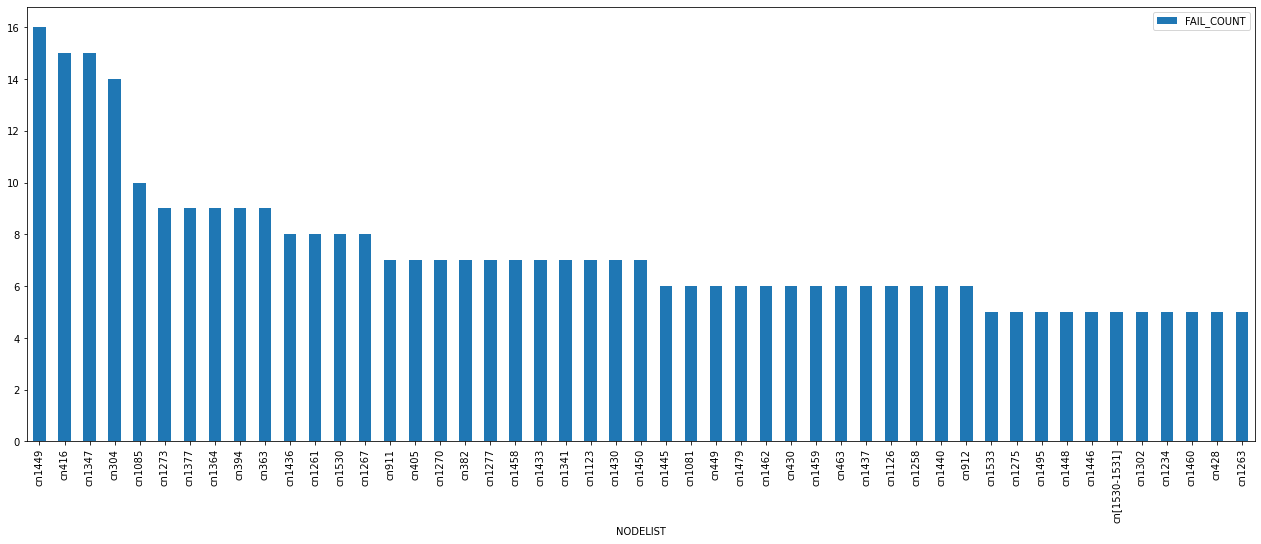

In [10]:
problem_nodes.plot(kind='bar',x='NODELIST', y='FAIL_COUNT', figsize=(22,8));

This is still quite a bit of nodes, so I decided to slice the data further, only taking the top 4 nodes. I chose this because cn304 had 14 failures, whereas cn1085 had 10. This is the biggest dropoff seen in the data.

In [11]:
big_problem_nodes = node_failure_df[node_failure_df['FAIL_COUNT']>10]
big_problem_nodes

,NODELIST,FAIL_COUNT
0,cn1449,16
1,cn416,15
2,cn1347,15
3,cn304,14


It's not fair to go purely by count since some nodes may be used more than others or used on harder jobs than others, so I decided to use %failed as well as compare memory useage.

In [12]:
total_jobs_df = pd.DataFrame(full_df['NODELIST'].value_counts())

In [13]:
total_jobs_df = total_jobs_df.reset_index()

In [14]:
total_jobs_df.columns = ['NODELIST','JOB_COUNT']

In [15]:
node_failure_df = node_failure_df.merge(total_jobs_df, on='NODELIST')

In [16]:
node_failure_df['PERCENT_FAILED'] = (node_failure_df['FAIL_COUNT'] / node_failure_df['JOB_COUNT']) *100

In [17]:
node_failure_df.sort_values('JOB_COUNT', ascending=False)

,NODELIST,FAIL_COUNT,JOB_COUNT,PERCENT_FAILED
56,cn1091,4,14320,0.027933
231,cn1367,1,13432,0.007445
3,cn304,14,13243,0.105716
27,cn449,6,12148,0.049391
1,cn416,15,12087,0.124100
...,...,...,...,...
256,cn[471,1,1,100.000000
258,cn[1430-1433],1,1,100.000000
365,cn[494-497],1,1,100.000000
329,cn[1461-1462],1,1,100.000000


In [18]:
problem_nodes = node_failure_df[node_failure_df['JOB_COUNT']>3]

In [19]:
problem_nodes.sort_values('PERCENT_FAILED', ascending=False).head(50)

,NODELIST,FAIL_COUNT,JOB_COUNT,PERCENT_FAILED
43,cn[1530-1531],5,6,83.333333
79,cn[1437,3,4,75.000000
85,cn[1352,3,4,75.000000
109,cn[1273-1275],3,4,75.000000
99,cn[1318-1320],3,4,75.000000
113,cn[1505-1506],3,5,60.000000
91,cn[1422-1423],3,5,60.000000
60,cn[1468-1469],4,7,57.142857
74,cn[1297-1298],4,7,57.142857
103,cn[1421-1422],3,6,50.000000


In [20]:
problem_nodes = node_failure_df[node_failure_df['JOB_COUNT']>25] #chose 25 bc job counts go from 24 to 519
problem_nodes.sort_values('PERCENT_FAILED', ascending=False)

,NODELIST,FAIL_COUNT,JOB_COUNT,PERCENT_FAILED
181,cn1400,2,519,0.385356
328,cn1478,1,366,0.273224
9,cn363,9,4080,0.220588
2,cn1347,15,7628,0.196644
7,cn1364,9,4888,0.184124
...,...,...,...,...
287,cn1388,1,10250,0.009756
316,cn1292,1,10375,0.009639
363,cn1399,1,10486,0.009537
382,cn1121,1,10591,0.009442


'cn1449','cn1347','cn416','cn304' were the top 4 when looking purely at fail counts


cn1400, cn1478, cn363, cn1347 were the top 4 when looking at % of jobs failed

Since cn1347 shows up on both lists, it might be a node that is worth looking further into.
What I'd also like to look into is if these failures all occur on similar times/days or if they were spread out.